<a href="https://colab.research.google.com/github/Garvit2911/Bootcamp_DataScience/blob/main/HousePricePrediction(XGBoost).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset : https://www.kaggle.com/datasets/vikrishnan/boston-house-prices

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('/content/HousingData.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
df['CHAS'].value_counts()

CHAS
0.0    452
1.0     34
Name: count, dtype: int64

In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

Data Distribution for each variable

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

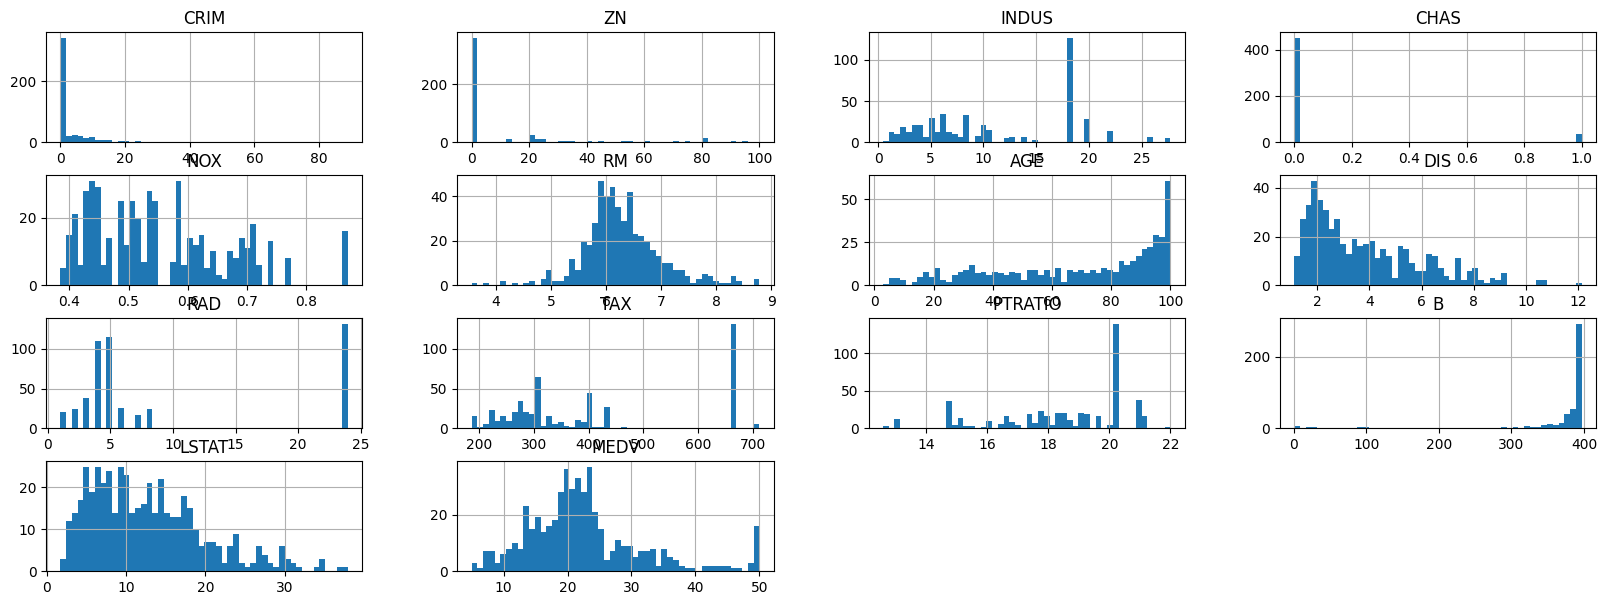

In [7]:
df.hist(bins=50,figsize=(20,7))

In [8]:
# from sklearn.model_selection import train_test_split
# train_set, test_set=train_test_split(df,test_size=0.3,random_state=42)

Simple Imputer to transform the data

In [9]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
X=imputer.fit_transform(df)

In [10]:
housing = pd.DataFrame(X,columns=df.columns)
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,11.43,36.2


Stratified Shuffle Split for taking records from every category of the particular attribute

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits =1 , test_size=0.3, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
  strat_train_set = df.iloc[train_index]
  strat_test_set = df.iloc[test_index]

In [12]:
strat_train_set['CHAS'].value_counts()

CHAS
0.0    317
1.0     24
Name: count, dtype: int64

In [13]:
h_train = strat_train_set.copy()

correlation matrix

In [14]:
corr_matrix = housing.corr()

In [15]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.362292
B          0.333461
DIS        0.249929
CHAS       0.183844
AGE       -0.377572
RAD       -0.381626
CRIM      -0.383895
NOX       -0.427321
TAX       -0.468536
INDUS     -0.476394
PTRATIO   -0.507787
LSTAT     -0.723093
Name: MEDV, dtype: float64

Scatter Matrix  --->  scatter_matrix from pandas.plotting

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

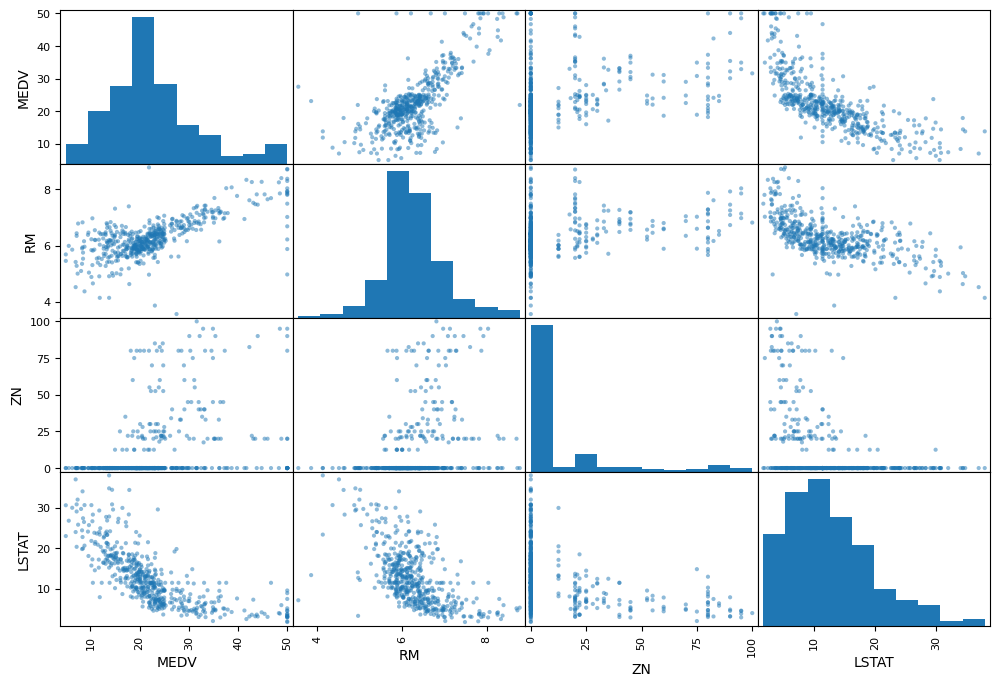

In [16]:
from pandas.plotting import scatter_matrix
attributes=['MEDV','RM','ZN','LSTAT']
scatter_matrix(housing[attributes], figsize=(12,8))

Plotting the relation between No. of rooms to the Median Price in $1000 MEDV

<Axes: xlabel='RM', ylabel='MEDV'>

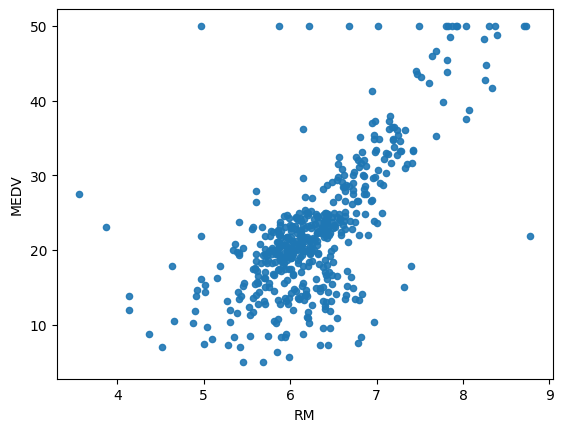

In [17]:
housing.plot(kind="scatter",x="RM",y='MEDV',alpha=0.9)

Different attribute combonation try out

In [18]:
housing['TAXRM'] = housing['TAX'] / housing['RM']
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.362292
B          0.333461
DIS        0.249929
CHAS       0.183844
AGE       -0.377572
RAD       -0.381626
CRIM      -0.383895
NOX       -0.427321
TAX       -0.468536
INDUS     -0.476394
PTRATIO   -0.507787
TAXRM     -0.537650
LSTAT     -0.723093
Name: MEDV, dtype: float64

<Axes: xlabel='TAXRM', ylabel='MEDV'>

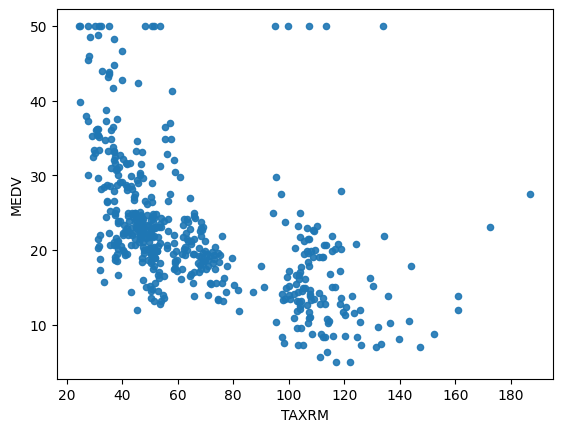

In [19]:
housing.plot(kind="scatter", x='TAXRM', y='MEDV', alpha=0.9)

Pipeline Creation

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

In [21]:
housing2=my_pipeline.fit_transform(df)

In [22]:
housing2 = pd.DataFrame(housing2)
housing2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.405592,0.314369,-1.301706,-0.268391,-0.144217,0.413672,-0.132771,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.096193,0.159686
1,-0.403140,-0.468160,-0.591052,-0.268391,-0.740262,0.194274,0.366141,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.502779,-0.101524
2,-0.403142,-0.468160,-0.591052,-0.268391,-0.740262,1.282714,-0.282080,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.231709,1.324247
3,-0.402549,-0.468160,-1.321115,-0.268391,-0.835284,1.016303,-0.839258,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.387195,1.182758
4,-0.398265,-0.468160,-1.321115,-0.268391,-0.835284,1.228577,-0.533356,1.077737,-0.752922,-1.106115,0.113032,0.441052,-0.176116,1.487503


In [23]:
housing2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    float64
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    float64
 9   9       506 non-null    float64
 10  10      506 non-null    float64
 11  11      506 non-null    float64
 12  12      506 non-null    float64
 13  13      506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [24]:
housing2.shape

(506, 14)

Select and Train the Model

In [25]:
housing3 = my_pipeline.fit_transform(strat_train_set)

In [26]:
x = strat_train_set.drop("MEDV", axis=1)
y = strat_train_set['MEDV'].copy()

In [27]:
# from sklearn.linear_model import LinearRegression
# model = LinearRegression()

Importing XGBoost Regressor

In [28]:
import xgboost as xg
model = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)

In [29]:
# model.fit(housing3 , y)

In [30]:
model.fit(housing3 , y)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:28:33] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [31]:
y_pred_train = model.predict(housing3)

In [32]:
import numpy as np
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y, y_pred_train)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.38033171148641215

Cross Validation

In [33]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing3, y, scoring='neg_mean_squared_error', cv=10)
rmse_scores = np.sqrt(-scores)
rmse_scores

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:28:34] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:28:34] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:28:34] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:28:34] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:

array([0.34244449, 0.65626508, 0.30548783, 0.47743181, 0.66370599,
       0.5044564 , 0.62915355, 0.61256037, 0.45165724, 0.42634259])



```
# This is formatted as code
```

Scores

In [34]:
def print_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("STD:",scores.std())

In [35]:
print_scores(rmse_scores)

Scores: [0.34244449 0.65626508 0.30548783 0.47743181 0.66370599 0.5044564
 0.62915355 0.61256037 0.45165724 0.42634259]
Mean: 0.5069505339855066
STD: 0.1228967641079863


Saving the Model

In [36]:
from joblib import dump, load
dump(model, 'MG_Housing')

['MG_Housing']

Testing of Model

In [37]:
housing_test = my_pipeline.fit_transform(strat_test_set)

In [38]:
x_test = strat_test_set.drop('MEDV', axis=1)
y_test = strat_test_set['MEDV'].copy()

In [39]:
y_pred_test = model.predict(housing_test)

In [40]:
final_mse = mean_squared_error(y_test, y_pred_test)

In [41]:
final_rmse = np.sqrt(final_mse)

In [42]:
final_rmse

1.2623331865961633

In [43]:
print(y_pred_test)
print("\n")
print(list(y_test))

[20.352495  42.39873   22.204868  13.623998  46.058662  14.190248
 22.693121  10.870694  19.405827   7.8627343 15.643792  19.497042
 21.821222  18.05416   23.836601  28.87484    9.834956  30.399927
 17.547829  45.827217  28.246273  12.089621  18.62884   21.513145
 12.089621  26.939806  21.237898  13.623998  15.310553  25.168957
 25.168957  23.836601  45.50618   22.591803  45.50618    6.935737
 45.827217  20.382483  30.491877  20.446413  36.697     21.661474
 12.513201  18.816198  13.400314  14.29665   24.159494  20.191
 22.591803  21.821222  22.591803  21.237898  23.242874  22.693121
 22.768848  27.0088    23.770061  18.93574   19.915897  17.979315
 19.88591   23.423906  40.11239   17.979315  42.39873   14.90429
 31.0184    24.472954  16.437447  19.367561  13.623998  18.965727
 19.527029  19.497042  18.965727  26.459324  18.93574    8.513981
 32.91457   31.389729  20.446413  29.749556  22.90047   24.114702
 13.623998  20.82751   32.91457   36.697     27.938934  23.242874
 27.0088    20

From Saved model perform testing

In [44]:
from joblib import dump, load
import numpy as np
model = load('/content/MG_Housing')
input = np.array([[4.83,0.0,18.10,0.0,0.583,5.90,53.2,3.15,24,666,20.2,388.22,11.45,24]])
model.predict(input)

array([48.77285], dtype=float32)